In [29]:
import pandas as pd
import numpy as np
#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
file_path = "/content/drive/MyDrive/生資基礎/下/0410-振慶/312112009.txt"

df = pd.read_csv(file_path, sep='\t')

In [31]:
df.set_index(df.columns[0], inplace=True)
df

,T_A6AO,T_A8HM,T_8256,T_7708,T_A8IF,T_A8SP,T_A88M,T_A9O9,T_7783,T_A8MK,...,N_A83J,N_7330,N_7819,N_7317,N_7314,N_5769,N_6384,N_7738,N_7782,N_5761
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000135537,1.104786e+04,13201.840894,13341.404059,15623.961173,14207.989654,19320.251802,11321.096486,14548.200810,21374.762141,13861.102884,...,11185.604832,10998.616768,17434.301042,15997.168008,13124.938477,15912.079959,11127.709945,11775.442315,15965.827527,12234.622855
ENSG00000185028,0.000000e+00,847.637211,1061.758511,223.219069,0.000000,285.913159,0.000000,1149.286646,1120.225389,865.819419,...,541.332972,258.006456,1579.728562,240.714846,0.000000,249.207334,1793.308628,0.000000,501.560480,1514.359001
ENSG00000152254,0.000000e+00,142.222222,0.000000,112.359551,230.050324,143.917248,0.000000,0.000000,469.897210,0.000000,...,544.970729,259.740260,454.384097,121.166225,147.874307,0.000000,451.339915,0.000000,252.465483,457.360648
ENSG00000168411,2.333239e+04,89988.828736,82021.871423,87767.321011,50929.547644,40695.857423,68362.611866,100052.717827,76726.255575,64041.441554,...,60916.705872,69680.899147,97573.537749,74440.386633,87060.569282,120602.356930,53814.052813,83495.900236,73098.813059,91083.037000
ENSG00000178233,3.864636e+02,488.489955,611.887209,1093.442228,1975.381739,1565.320860,350.479082,1324.658652,537.984532,1081.097961,...,1793.816228,1189.504762,1430.614885,624.253540,677.204190,502.660185,861.230528,1025.282089,794.880105,1047.262887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000150347,1.396090e+05,141760.574882,380303.977235,436883.082208,264791.050186,432333.475865,167406.808387,265549.633933,619171.880992,356887.639504,...,331000.545236,338087.469855,475867.715037,624874.658668,453390.340895,259958.963552,395512.123702,157300.830487,412162.116455,342782.393987
ENSG00000173275,2.820196e+04,27934.125495,36975.092732,32674.916205,25087.570458,19154.089588,17349.810468,41719.105264,26062.544597,33473.423443,...,29076.182193,21624.716747,29637.799450,21241.030282,16212.766991,16180.242012,21257.997109,30452.801658,31306.548841,16357.293342
ENSG00000100220,1.312482e+06,865973.164481,775728.493611,772995.975180,724516.103230,410228.840262,684699.761859,904895.129425,546028.368370,831574.322648,...,607297.827953,715320.974819,727435.530258,890225.475836,712911.664163,949557.121559,830410.072984,810693.817210,878742.382761,763108.102779


### 找NA值

In [32]:
na_count = df.isna().sum()
print(na_count)
total_na_count = df.isna().sum().sum()
print("Total NA count:", total_na_count)

T_A6AO    0
T_A8HM    0
T_8256    0
T_7708    0
T_A8IF    0
         ..
N_5769    0
N_6384    0
N_7738    0
N_7782    0
N_5761    0
Length: 544, dtype: int64
Total NA count: 0


In [33]:
null_counts = df.isnull().sum()
print(null_counts)
total_null_count = df.isnull().sum().sum()
print("Total NULL count:", total_null_count)

T_A6AO    0
T_A8HM    0
T_8256    0
T_7708    0
T_A8IF    0
         ..
N_5769    0
N_6384    0
N_7738    0
N_7782    0
N_5761    0
Length: 544, dtype: int64
Total NULL count: 0


### 資料standardized 處理

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler() #平均值為0，標準差為1
scaled_data = scaler.fit_transform(df)

df_normalized = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)
df_normalized

,T_A6AO,T_A8HM,T_8256,T_7708,T_A8IF,T_A8SP,T_A88M,T_A9O9,T_7783,T_A8MK,...,N_A83J,N_7330,N_7819,N_7317,N_7314,N_5769,N_6384,N_7738,N_7782,N_5761
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000135537,-0.141165,-0.095801,-0.101948,-0.142875,-0.088335,-0.100917,-0.058320,-0.115047,-0.104488,-0.089446,...,-0.089562,-0.110648,-0.097134,-0.060641,-0.137135,-0.097595,-0.068680,-0.024901,-0.065756,-0.095689
ENSG00000185028,-0.144754,-0.099237,-0.105986,-0.151359,-0.091593,-0.107033,-0.059555,-0.120481,-0.112909,-0.092963,...,-0.092446,-0.114544,-0.102397,-0.063877,-0.144129,-0.102391,-0.070255,-0.025432,-0.069154,-0.099106
ENSG00000152254,-0.144754,-0.099433,-0.106336,-0.151420,-0.091540,-0.107079,-0.059555,-0.120947,-0.113180,-0.093197,...,-0.092445,-0.114544,-0.102771,-0.063901,-0.144050,-0.102468,-0.070482,-0.025432,-0.069208,-0.099442
ENSG00000168411,-0.137174,-0.074443,-0.079362,-0.103132,-0.079915,-0.094050,-0.052097,-0.080373,-0.081475,-0.075863,...,-0.076089,-0.089359,-0.070528,-0.048641,-0.097738,-0.065533,-0.061474,-0.021668,-0.053203,-0.070564
ENSG00000178233,-0.144629,-0.099337,-0.106134,-0.150880,-0.091140,-0.106622,-0.059517,-0.120410,-0.113151,-0.092905,...,-0.092106,-0.114206,-0.102447,-0.063798,-0.143768,-0.102314,-0.070413,-0.025385,-0.069089,-0.099254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000150347,-0.099398,-0.060042,0.018732,0.089195,-0.030876,0.031779,-0.041291,-0.013260,0.144053,0.003400,...,-0.002917,0.008013,0.055063,0.064378,0.097461,-0.022854,-0.003794,-0.018341,0.021296,0.009641
ENSG00000173275,-0.135592,-0.091703,-0.094176,-0.133482,-0.085840,-0.100971,-0.057662,-0.104029,-0.102539,-0.084137,...,-0.084715,-0.106793,-0.093082,-0.059565,-0.135490,-0.097512,-0.066970,-0.024059,-0.062385,-0.094376
ENSG00000100220,0.281646,0.141394,0.148772,0.274359,0.074538,0.024677,0.015145,0.246013,0.113643,0.131883,...,0.071939,0.144864,0.138581,0.118862,0.235747,0.188338,0.069618,0.011110,0.123813,0.143580


##用linear regression 嘗試預測TP53的表達

### 抓TP53資料

In [36]:
tp53_expression = df_normalized[df_normalized.index == 'ENSG00000141510']

features = df_normalized[df_normalized.index != 'ENSG00000141510']

In [37]:
features

,T_A6AO,T_A8HM,T_8256,T_7708,T_A8IF,T_A8SP,T_A88M,T_A9O9,T_7783,T_A8MK,...,N_A83J,N_7330,N_7819,N_7317,N_7314,N_5769,N_6384,N_7738,N_7782,N_5761
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000135537,-0.141165,-0.095801,-0.101948,-0.142875,-0.088335,-0.100917,-0.058320,-0.115047,-0.104488,-0.089446,...,-0.089562,-0.110648,-0.097134,-0.060641,-0.137135,-0.097595,-0.068680,-0.024901,-0.065756,-0.095689
ENSG00000185028,-0.144754,-0.099237,-0.105986,-0.151359,-0.091593,-0.107033,-0.059555,-0.120481,-0.112909,-0.092963,...,-0.092446,-0.114544,-0.102397,-0.063877,-0.144129,-0.102391,-0.070255,-0.025432,-0.069154,-0.099106
ENSG00000152254,-0.144754,-0.099433,-0.106336,-0.151420,-0.091540,-0.107079,-0.059555,-0.120947,-0.113180,-0.093197,...,-0.092445,-0.114544,-0.102771,-0.063901,-0.144050,-0.102468,-0.070482,-0.025432,-0.069208,-0.099442
ENSG00000168411,-0.137174,-0.074443,-0.079362,-0.103132,-0.079915,-0.094050,-0.052097,-0.080373,-0.081475,-0.075863,...,-0.076089,-0.089359,-0.070528,-0.048641,-0.097738,-0.065533,-0.061474,-0.021668,-0.053203,-0.070564
ENSG00000178233,-0.144629,-0.099337,-0.106134,-0.150880,-0.091140,-0.106622,-0.059517,-0.120410,-0.113151,-0.092905,...,-0.092106,-0.114206,-0.102447,-0.063798,-0.143768,-0.102314,-0.070413,-0.025385,-0.069089,-0.099254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000150347,-0.099398,-0.060042,0.018732,0.089195,-0.030876,0.031779,-0.041291,-0.013260,0.144053,0.003400,...,-0.002917,0.008013,0.055063,0.064378,0.097461,-0.022854,-0.003794,-0.018341,0.021296,0.009641
ENSG00000173275,-0.135592,-0.091703,-0.094176,-0.133482,-0.085840,-0.100971,-0.057662,-0.104029,-0.102539,-0.084137,...,-0.084715,-0.106793,-0.093082,-0.059565,-0.135490,-0.097512,-0.066970,-0.024059,-0.062385,-0.094376
ENSG00000100220,0.281646,0.141394,0.148772,0.274359,0.074538,0.024677,0.015145,0.246013,0.113643,0.131883,...,0.071939,0.144864,0.138581,0.118862,0.235747,0.188338,0.069618,0.011110,0.123813,0.143580


In [38]:
tp53_expression

,T_A6AO,T_A8HM,T_8256,T_7708,T_A8IF,T_A8SP,T_A88M,T_A9O9,T_7783,T_A8MK,...,N_A83J,N_7330,N_7819,N_7317,N_7314,N_5769,N_6384,N_7738,N_7782,N_5761
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000141510,-0.032828,0.028514,0.040779,0.020278,0.022659,-0.100003,0.021885,-0.021707,0.064879,0.00227,...,-0.008074,0.006671,0.01035,-0.006703,0.038107,0.122173,-0.017045,-0.01628,-0.020465,0.048445


###畫tp53分佈

[-0.12058556944787864, -0.1100299833643028, -0.10736323446650743, -0.10570840601827897, -0.10386696593643023, -0.1005874325824373, -0.10000271484525296, -0.09622677526334027, -0.08908705294472802, -0.08428368401442594, -0.08346411064935894, -0.08116762191899302, -0.07337616543282935, -0.07098462871601911, -0.06775293308925437, -0.06762824189617289, -0.0657149167568853, -0.06108083558800341, -0.059349406459980734, -0.05851007534455441, -0.057182431697038, -0.05701160868417398, -0.0547959815288086, -0.05373589242748271, -0.05137673052742355, -0.05069560681380277, -0.049610369276740174, -0.0477245437679933, -0.04646343012702661, -0.045304825338487016, -0.045086408710597, -0.044522071809172795, -0.04311743759968678, -0.04203738941608667, -0.04067430097044518, -0.03696349346708203, -0.0366167627426494, -0.03634249264405471, -0.035176094076038, -0.034763058247719185, -0.03451600387726183, -0.03442094654151969, -0.03433109173196311, -0.034170398281771805, -0.03400634071211551, -0.034003653842

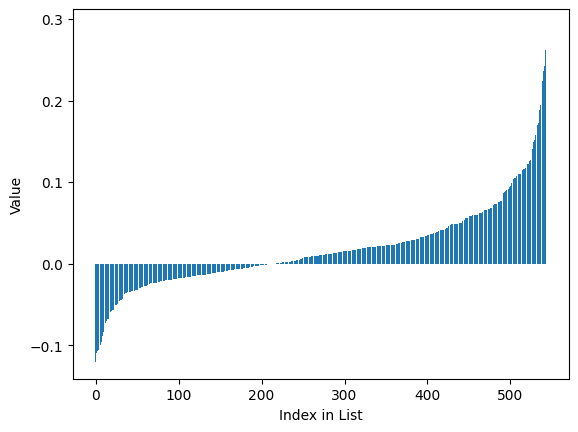

In [39]:
import matplotlib.pyplot as plt
#sorted
tp53_expression_list = tp53_expression.iloc[0].tolist()
tp53_expression_sorted_list = sorted(tp53_expression_list)
print(tp53_expression_sorted_list)
#畫分佈圖
plt.bar(range(len(tp53_expression_sorted_list)), tp53_expression_sorted_list)

plt.xlabel('Index in List')
plt.ylabel('Value')

plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### linear regration

In [41]:
# 拆分資料集(X=除了TP53的其他基因表達量,y=TP53的基因表達量)
X_train, X_test, y_train, y_test = train_test_split(features.T, tp53_expression.T, test_size=0.2, random_state=42)

# LinearRegression
model = LinearRegression()

# fit
model.fit(X_train, y_train)

# pred
y_pred = model.predict(X_test)

# mse
mse = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2score)

Mean Squared Error: 0.0016930409976244367
R-squared Score: 0.22005892698321017


<ipython-input-42-13eba2732ffa>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Actual')


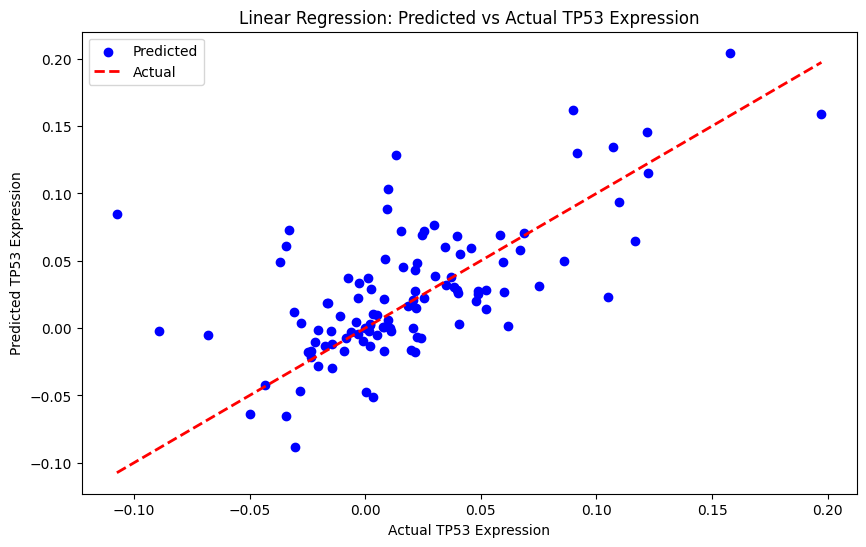

In [42]:
import matplotlib.pyplot as plt

# pred vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Actual')
plt.xlabel('Actual TP53 Expression')
plt.ylabel('Predicted TP53 Expression')
plt.title('Linear Regression: Predicted vs Actual TP53 Expression')
plt.legend()
plt.show()


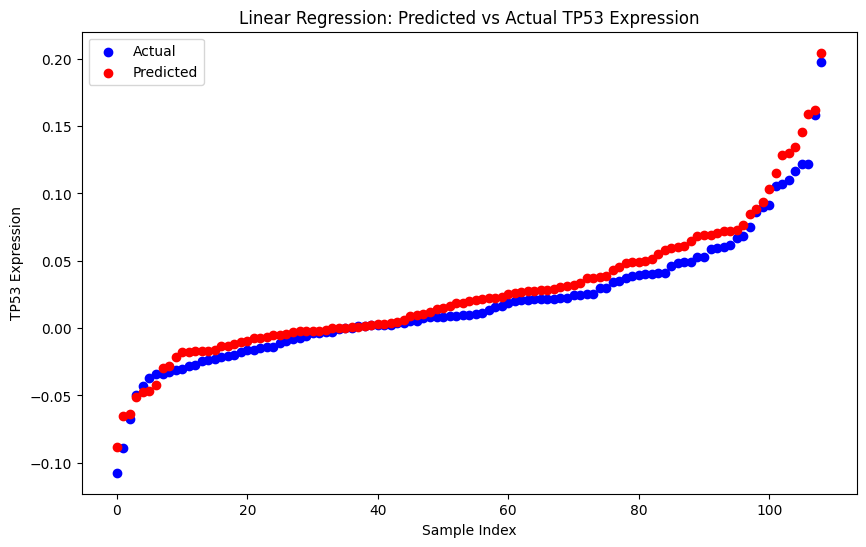

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), sorted(y_test.values), color='blue', label='Actual')
plt.scatter(range(len(y_pred)), sorted(y_pred), color='red', label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('TP53 Expression')
plt.title('Linear Regression: Predicted vs Actual TP53 Expression')
plt.legend()
plt.show()

透過sklearn.linear_model的LinearRegression找出最小MSE，來找出最適合預測TP53的模型，再透過比較實際值跟預測值的圖來做確認

## 實作邏輯迴歸和SVM演算法來建構兩個模型來嘗試預測樣本的組織類型



In [44]:
#將TN分開
Tumor = df_normalized.filter(regex='^T_')
Normal = df_normalized.filter(regex='^N_')

In [45]:
Tumor

,T_A6AO,T_A8HM,T_8256,T_7708,T_A8IF,T_A8SP,T_A88M,T_A9O9,T_7783,T_A8MK,...,T_A4ZV,T_AB20,T_A8ZI,T_A6AP,T_A7F5,T_A7FD,T_5766,T_A9DX,T_5764,T_6371
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000135537,-0.141165,-0.095801,-0.101948,-0.142875,-0.088335,-0.100917,-0.058320,-0.115047,-0.104488,-0.089446,...,-0.081459,-0.071857,-0.047046,-0.159205,-0.113260,-0.137204,-0.133312,-0.053362,-0.108446,-0.094839
ENSG00000185028,-0.144754,-0.099237,-0.105986,-0.151359,-0.091593,-0.107033,-0.059555,-0.120481,-0.112909,-0.092963,...,-0.082842,-0.073661,-0.049279,-0.162450,-0.116576,-0.141178,-0.140829,-0.054998,-0.118158,-0.098322
ENSG00000152254,-0.144754,-0.099433,-0.106336,-0.151420,-0.091540,-0.107079,-0.059555,-0.120947,-0.113180,-0.093197,...,-0.082842,-0.073661,-0.049323,-0.162515,-0.117296,-0.141178,-0.140937,-0.054980,-0.118799,-0.098291
ENSG00000168411,-0.137174,-0.074443,-0.079362,-0.103132,-0.079915,-0.094050,-0.052097,-0.080373,-0.081475,-0.075863,...,-0.069892,-0.061893,-0.044479,-0.144587,-0.100594,-0.089762,-0.088107,-0.049878,-0.095015,-0.076131
ENSG00000178233,-0.144629,-0.099337,-0.106134,-0.150880,-0.091140,-0.106622,-0.059517,-0.120410,-0.113151,-0.092905,...,-0.082757,-0.073346,-0.049361,-0.162468,-0.117218,-0.141113,-0.140750,-0.054890,-0.118429,-0.098198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000150347,-0.099398,-0.060042,0.018732,0.089195,-0.030876,0.031779,-0.041291,-0.013260,0.144053,0.003400,...,-0.007962,-0.046186,-0.000402,-0.108255,-0.059122,0.030367,0.147749,-0.019911,0.122014,0.011063
ENSG00000173275,-0.135592,-0.091703,-0.094176,-0.133482,-0.085840,-0.100971,-0.057662,-0.104029,-0.102539,-0.084137,...,-0.076202,-0.069856,-0.044947,-0.155547,-0.108030,-0.130712,-0.125946,-0.047601,-0.109709,-0.088442
ENSG00000100220,0.281646,0.141394,0.148772,0.274359,0.074538,0.024677,0.015145,0.246013,0.113643,0.131883,...,0.037739,0.055334,-0.007861,0.329662,0.103430,0.301405,0.171861,-0.028390,0.233536,0.176362


In [46]:
Normal

,N_7781,N_7737,N_7331,N_7115,N_6333,N_7315,N_7794,N_8262,N_7793,N_7747,...,N_A83J,N_7330,N_7819,N_7317,N_7314,N_5769,N_6384,N_7738,N_7782,N_5761
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000135537,-0.146045,-0.030702,-0.115827,-0.086063,-0.071472,-0.192409,-0.172904,-0.104218,-0.121568,-0.021560,...,-0.089562,-0.110648,-0.097134,-0.060641,-0.137135,-0.097595,-0.068680,-0.024901,-0.065756,-0.095689
ENSG00000185028,-0.154186,-0.031629,-0.118102,-0.089735,-0.073254,-0.202337,-0.183490,-0.109206,-0.127947,-0.021848,...,-0.092446,-0.114544,-0.102397,-0.063877,-0.144129,-0.102391,-0.070255,-0.025432,-0.069154,-0.099106
ENSG00000152254,-0.154455,-0.031656,-0.121279,-0.089734,-0.073301,-0.203862,-0.183645,-0.109206,-0.127625,-0.021843,...,-0.092445,-0.114544,-0.102771,-0.063901,-0.144050,-0.102468,-0.070482,-0.025432,-0.069208,-0.099442
ENSG00000168411,-0.109768,-0.026460,-0.087536,-0.070181,-0.062615,-0.100995,-0.114165,-0.066241,-0.087461,-0.018858,...,-0.076089,-0.089359,-0.070528,-0.048641,-0.097738,-0.065533,-0.061474,-0.021668,-0.053203,-0.070564
ENSG00000178233,-0.154029,-0.031665,-0.120706,-0.089652,-0.073219,-0.203119,-0.183198,-0.109041,-0.127473,-0.021837,...,-0.092106,-0.114206,-0.102447,-0.063798,-0.143768,-0.102314,-0.070413,-0.025385,-0.069089,-0.099254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000150347,0.069396,-0.014994,0.008978,0.007573,-0.041773,0.250705,0.272869,0.025548,-0.056202,-0.016244,...,-0.002917,0.008013,0.055063,0.064378,0.097461,-0.022854,-0.003794,-0.018341,0.021296,0.009641
ENSG00000173275,-0.137631,-0.030676,-0.105898,-0.084692,-0.067433,-0.180302,-0.166387,-0.094461,-0.113735,-0.021300,...,-0.084715,-0.106793,-0.093082,-0.059565,-0.135490,-0.097512,-0.066970,-0.024059,-0.062385,-0.094376
ENSG00000100220,0.244931,0.021511,0.215768,0.137293,0.062212,0.354812,0.301028,0.136171,0.275468,0.012374,...,0.071939,0.144864,0.138581,0.118862,0.235747,0.188338,0.069618,0.011110,0.123813,0.143580


### 邏輯迴歸建構模型來嘗試預測樣本的組織類型(T,N)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [48]:
#做出兩類別(type 'T'==1,'N'==0)
def assign_type(col_name):
    if col_name.startswith('N_'):
        return 0
    elif col_name.startswith('T_'):
        return 1
    else:
        return None

df_normalized.loc['Type'] = [assign_type(col) for col in df_normalized.columns]
#
df_normalized

,T_A6AO,T_A8HM,T_8256,T_7708,T_A8IF,T_A8SP,T_A88M,T_A9O9,T_7783,T_A8MK,...,N_A83J,N_7330,N_7819,N_7317,N_7314,N_5769,N_6384,N_7738,N_7782,N_5761
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000135537,-0.141165,-0.095801,-0.101948,-0.142875,-0.088335,-0.100917,-0.058320,-0.115047,-0.104488,-0.089446,...,-0.089562,-0.110648,-0.097134,-0.060641,-0.137135,-0.097595,-0.068680,-0.024901,-0.065756,-0.095689
ENSG00000185028,-0.144754,-0.099237,-0.105986,-0.151359,-0.091593,-0.107033,-0.059555,-0.120481,-0.112909,-0.092963,...,-0.092446,-0.114544,-0.102397,-0.063877,-0.144129,-0.102391,-0.070255,-0.025432,-0.069154,-0.099106
ENSG00000152254,-0.144754,-0.099433,-0.106336,-0.151420,-0.091540,-0.107079,-0.059555,-0.120947,-0.113180,-0.093197,...,-0.092445,-0.114544,-0.102771,-0.063901,-0.144050,-0.102468,-0.070482,-0.025432,-0.069208,-0.099442
ENSG00000168411,-0.137174,-0.074443,-0.079362,-0.103132,-0.079915,-0.094050,-0.052097,-0.080373,-0.081475,-0.075863,...,-0.076089,-0.089359,-0.070528,-0.048641,-0.097738,-0.065533,-0.061474,-0.021668,-0.053203,-0.070564
ENSG00000178233,-0.144629,-0.099337,-0.106134,-0.150880,-0.091140,-0.106622,-0.059517,-0.120410,-0.113151,-0.092905,...,-0.092106,-0.114206,-0.102447,-0.063798,-0.143768,-0.102314,-0.070413,-0.025385,-0.069089,-0.099254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000173275,-0.135592,-0.091703,-0.094176,-0.133482,-0.085840,-0.100971,-0.057662,-0.104029,-0.102539,-0.084137,...,-0.084715,-0.106793,-0.093082,-0.059565,-0.135490,-0.097512,-0.066970,-0.024059,-0.062385,-0.094376
ENSG00000100220,0.281646,0.141394,0.148772,0.274359,0.074538,0.024677,0.015145,0.246013,0.113643,0.131883,...,0.071939,0.144864,0.138581,0.118862,0.235747,0.188338,0.069618,0.011110,0.123813,0.143580
ENSG00000176087,0.105052,0.114582,0.146307,0.189754,0.054198,0.061006,0.019051,0.119929,0.099722,0.101488,...,0.065592,0.086867,0.135714,0.069380,0.133933,0.084430,0.057668,-0.003811,0.041950,0.158565


In [49]:
# X=基因表現量
X = df_normalized[df_normalized.index != 'Type'].T
# y=Type(0,1)
y = df_normalized.T['Type']

先做PCA/tSME

In [50]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

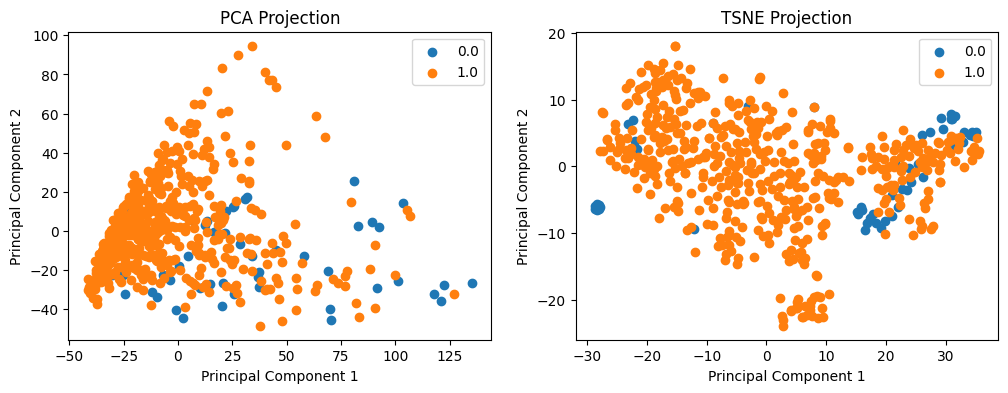

In [51]:
# PCA
pca = PCA(n_components=2)  # 2個主成分
X_pca = pca.fit_transform(X)
# 畫PCA
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label)
plt.title('PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# tSNE
tsne = TSNE(n_components=2)  # 2個主成分
X_tsne = tsne.fit_transform(X)
#畫tSNE
plt.subplot(1, 2, 2)
for label in np.unique(y):
    plt.scatter(X_tsne[y == label, 0], X_tsne[y == label, 1], label=label)
plt.title('TSNE Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

In [52]:
# 拆資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 模型
model = LogisticRegression(max_iter=1000)
# fit
model.fit(X_train, y_train)
# pred
y_pred = model.predict(X_test)
# auc
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9724770642201835


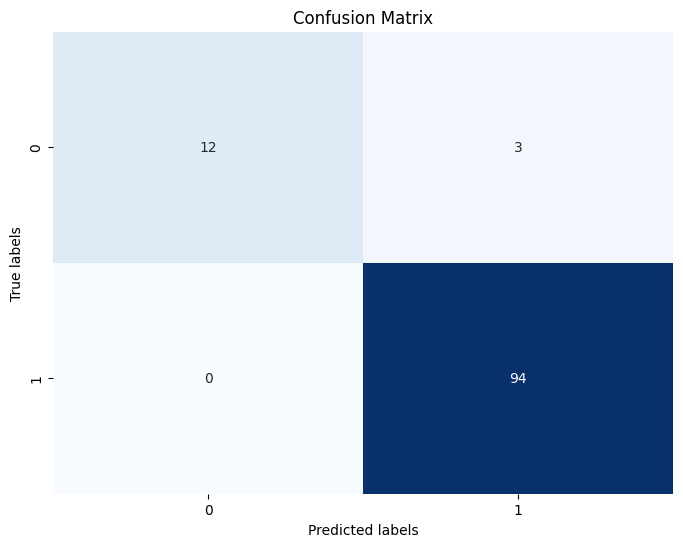

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 計算混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)

# 繪製混淆矩陣
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



### SVM建構模型來嘗試預測樣本的組織類型(T,N)

In [54]:
from sklearn.svm import SVC

model = SVC()
# fit
model.fit(X_train, y_train)
# pred
y_pred = model.predict(X_test)
# auc
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.908256880733945


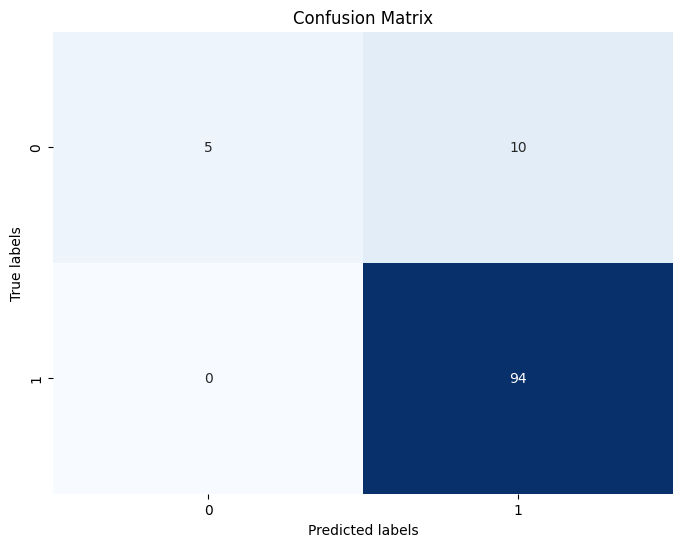

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 計算混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)

# 繪製混淆矩陣
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
